<a href="https://colab.research.google.com/github/ketkiambekar/housing-prices-prediction/blob/main/King_County_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To begin with, we download the King County Housing Dataset from Kaggle

In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#kaggle API Key 
import json
token = {"username":"dazzykin","key":"8e623a44cc7443bae9c0b42ca5d093c8"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [6]:
#Run this cell twice
!mkdir .kaggle
!ls
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d harlfoxem/housesalesprediction
%cd {/content}/datasets/harlfoxem/housesalesprediction
!unzip \*.zip

mkdir: cannot create directory ‘.kaggle’: File exists
'{'   drive   sample_data
- path is now set to: {/content}
housesalesprediction.zip: Skipping, found more recently modified local copy (use --force to force download)
/content/{/content}/datasets/harlfoxem/housesalesprediction


In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [33]:
#First glance of data
housing_data = pd.read_csv("kc_house_data.csv")
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
#Dropping Non-essential columns 
housing_data=housing_data.drop(labels=['id','date','lat','long'], axis='columns')
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [38]:
#Transform column "yr_renovated" to "Years since renovation" and "yr_built" to age of house.
housing_data['yr_renovated']= datetime.now().year - housing_data['yr_renovated']
housing_data['yr_built']= datetime.now().year - housing_data['yr_built']
housing_data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,66,2021,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,70,30,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,88,2021,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,56,2021,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,34,2021,98074,1800,7503


###Column definitions:  <BR>
id - Unique ID for each home sold <BR>
date - Date of the home sale <BR>
price - Price of each home sold <BR>
bedrooms - Number of bedrooms <BR>
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower <BR>
sqft_living - Square footage of the apartments interior living space <BR>
sqft_lot - Square footage of the land space <BR>
floors - Number of floors <BR>
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not <BR>
view - An index from 0 to 4 of how good the view of the property was <BR>
condition - An index from 1 to 5 on the condition of the apartment, <BR>
grade - An index from 1 to 13, where 1-3 falls short of building construction < and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.<BR>
sqft_above - The square footage of the interior housing space that is above ground level <BR>
sqft_basement - The square footage of the interior housing space that is below ground level <BR>
yr_built - The year the house was initially built <BR>
yr_renovated - The year of the house’s last renovation <BR>
zipcode - What zipcode area the house is in <BR>
lat - Lattitude <BR>
long - Longitude <BR>
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors <BR>
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors <BR

In [39]:
#We need to treat some columns as categorical and not continuous numerical data
housing_data['zipcode'] = housing_data['zipcode'].astype('category')
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,66,2021,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,70,30,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,88,2021,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,56,2021,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,34,2021,98074,1800,7503


In [40]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21613 non-null  float64 
 1   bedrooms       21613 non-null  int64   
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  int64   
 4   sqft_lot       21613 non-null  int64   
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  int64   
 7   view           21613 non-null  int64   
 8   condition      21613 non-null  int64   
 9   grade          21613 non-null  int64   
 10  sqft_above     21613 non-null  int64   
 11  sqft_basement  21613 non-null  int64   
 12  yr_built       21613 non-null  int64   
 13  yr_renovated   21613 non-null  int64   
 14  zipcode        21613 non-null  category
 15  sqft_living15  21613 non-null  int64   
 16  sqft_lot15     21613 non-null  int64   
dtypes: category(1), float64(3), int

In [43]:
#Check Missing Values
housing_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

The Data seems clean. There are no missing values. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


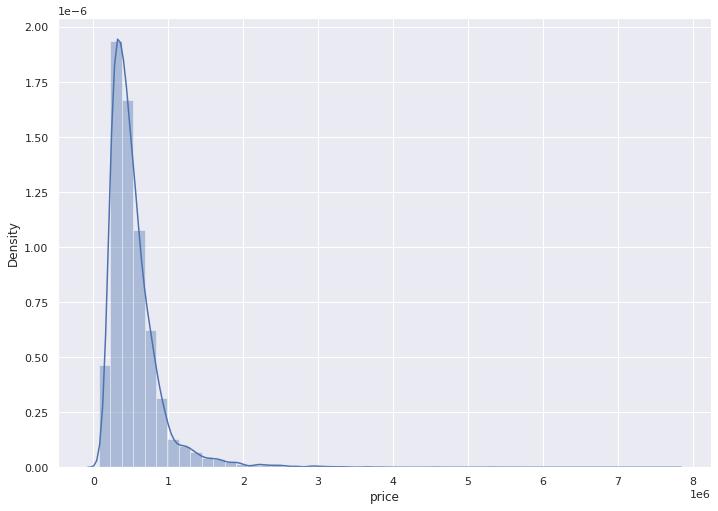

In [41]:
#Viewing price distribution
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(housing_data['price'], bins=50)
plt.show()

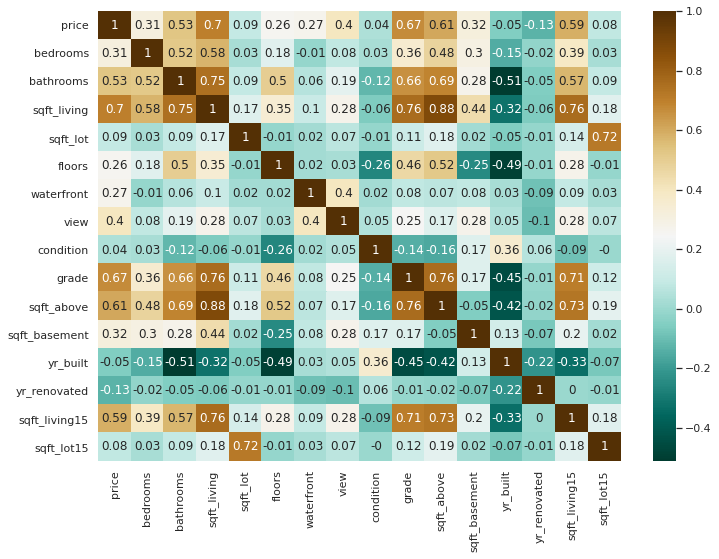

In [47]:
#Calculating Correlation Matrix 
correlation_matrix = housing_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap="BrBG_r")


From the correlation matrix we can see that following features are highly correlated with the target. 

*   Bathrooms. (0.53)
*   sqft_living (0.7)
*   sqft_above (0.61)
*   grade(0.67)
*   sqft_living15 (0.59)

The following are of secondary importance but are important still. 

*   view (0.4)
*   Bedrooms (0.31)
*   sqft_basement (0.32)


Let us for now only choose features whose absolute correlation is greater than 0.5


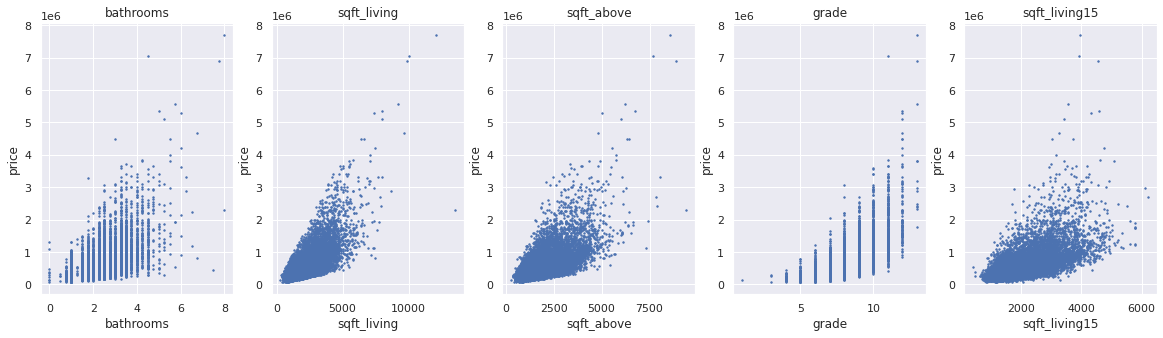

In [51]:
plt.figure(figsize=(20, 5))

features = ['bathrooms', 'sqft_living', 'sqft_above', 'grade','sqft_living15']
target = housing_data['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing_data[col]
    y = target
    plt.scatter(x, y, marker='o', s=2)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

Observations: <br>
We have some outliers in bathrooms. <br>
One in sqft_living. <br>
A couple in sqft_above. <br>
Some in sqft_living15. <br>


In [53]:
#Preparing Data for training
X = pd.DataFrame(np.c_[housing_data[features]])
Y = housing_data['price']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17290, 5)
(4323, 5)
(17290,)
(4323,)


In [55]:
#Model Training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#Model Score
print(f'The training score for this model is {round(model.score(X_train, Y_train), 4)}.')
print(f'The testing score for this model is {round(model.score(X_test, Y_test),4)}.')


The training score for this model is 0.5422.
The testing score for this model is 0.5521.


In [56]:
y_pred=model.predict(X_test)

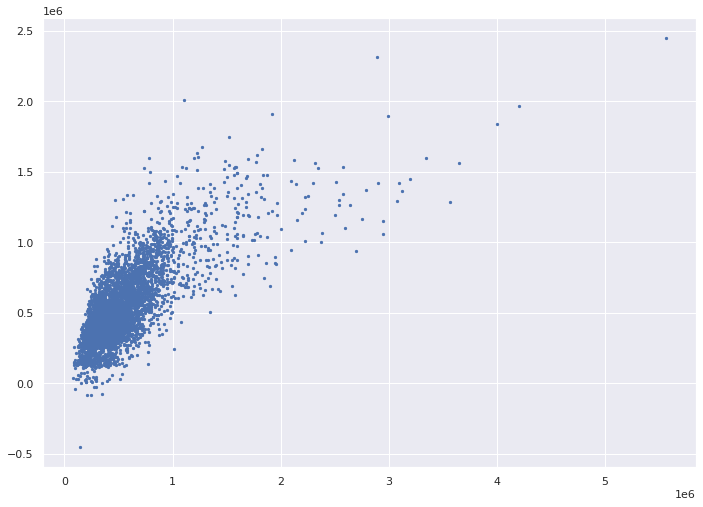

In [63]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_pred, s=5)
plt.show()